 Project/homework

**Titanic data set** is a multimodal tabular data suitable for binary classification.

Goals:
- review data: note some conclusions
- build a model: survival prediction is your outcome
- validate model: check for overfitting
- check feature importance:
  - which feature doesn't improve results
  - which features are the most important one

**Please send colab link to kwant@agh.edu.pl before 03.04.2024 (pro 05.04.2024)**.

## https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html
0. Survived Indicator
1. Passenger Class
2. Name
3. Sex
4. Age
5. Siblings Aboard
6. Parents Aboard
7. Fare paid in £s


- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

In [1]:
import platform
import pandas as pd
import numpy as np
v = platform.python_version_tuple();
if float(v[1]) < 10:
    raise Exception("MUST USE Python 3.10 to use MATCH expression!")

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
import sys;
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_colwidth = 1000

from enum import Enum, unique

@unique
class PDataType(Enum):
    NUMERICAL = 1
    CATHEGORICAL = 2

def remove_distinct_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]

def get_data_type(df, type):
    match type:
        case PDataType.NUMERICAL:
            return df.select_dtypes(np.number);
        case PDataType.CATHEGORICAL:
            return df.select_dtypes(include='object');

#select all cathegorigal data where the first value is more than percent%?
def get_cathegorical_data_by_percent(df, percent):
    col_names = get_data_type(df,PDataType.CATHEGORICAL)
    to_return = []
    for col_name in col_names:
        unique_v_df = (df[col_name].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        if unique_v_df.iloc[0].percent > percent:
            to_return.append(col_name);
    return to_return
    
def fill_empty_data_with(df, type, filler):
    col_names = get_data_type(df,type)
    for c in col_names:
        test_data_csv[c] = test_data_csv[c].fillna(filler)


In [2]:
DO_NOT_PLOT = False

In [3]:
#define Seaborn color palette to use
import numpy as np
from math import ceil
from itertools import zip_longest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pie_for_unique_category(df,col_name_x, ax):
    if not DO_NOT_PLOT:
        colors = sns.color_palette('pastel')
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}", ax = ax)


def plot_hist_for_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        fig, axs = plt.subplots(nrows=len(unique_v_df), figsize=(16,10))
        i = 0;
        for index, row in unique_v_df.iterrows():
            value_percent = row.iloc[1];
            value = row.iloc[0];
            name = index;
            sns.histplot(data=df.loc[df[col_name_x] == name], x=col_name_y, ax = axs[i],bins=100, label =f'{col_name_x} {name} : {value} | {value_percent:.2f}%')
            axs[i].set_xlim(df[col_name_y].min(), df[col_name_y].max())
            axs[i].legend()
            i+=1
        fig.suptitle(f"{col_name_x} on {col_name_y}")
        plt.show()
        
def plot_hist_for_stat(df,col_name_x, stat = 'count'):
    if not DO_NOT_PLOT:
        sns.histplot(data=df, x=col_name_x, stat = stat)
        plt.legend()
        plt.show()
                     
    
def plot_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        plot_hist_for_unique_category(df,col_name_x,col_name_y)
        fig, axs = plt.subplots(1, 2, figsize=(10,10))
        fig.tight_layout()
        plot_pie_for_unique_category(df,col_name_x,axs[0])
        sns.boxenplot(data=df, x=col_name_x, y=col_name_y, ax = axs[1])
        plt.show()
    
def plot_hist_for_unique_category_array(df,col_names_x,col_name_y):
    if not DO_NOT_PLOT:
        for col_name_x in col_names_x:
            plot_hist_for_unique_category(df,col_name_x,col_name_y)
            plt.show()

#RAVEL returns flatted array, depricated. use to_numpy
def plot_pie_for_unique_category_array(df,col_names_x):
    if not DO_NOT_PLOT:
        n_rows, n_cols = ceil(len(col_names_x) / 3), 3
        fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, 80))
        for col_name_x,ax in zip_longest(col_names_x,axs.ravel()):
            if col_name_x is not None:
                colors = sns.color_palette('pastel')
                unique_v_df = (df[col_name_x].value_counts()).to_frame()
                unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
                unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}",ax=ax )
            else:
                fig.delaxes(ax)
        plt.draw()
        plt.tight_layout()
    

def plot_correlation_for(df, col_name, n):
    corr = df.corr(numeric_only=True)[col_name].sort_values(ascending=False)
    top_corr = corr[1:n]
    selected_features = list(top_corr.index) + [col_name]
    correlation_matrix = df[selected_features].corr()
    mask = np.triu(correlation_matrix)
    if not DO_NOT_PLOT:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", vmin=-1, vmax=1,mask=mask)
        plt.title(f"Top of correlation with [{col_name}]", fontsize=16)
        plt.show()
    return top_corr

def plot_overall_correlation_for(df,target_cols,n_count):
    df_no_target = df.copy().drop(columns = target_cols)
    top_correlation = df_no_target.corr().unstack().sort_values(ascending = False).drop_duplicates()[1:n_count]
    top_correlation.plot.bar(grid = True)
    return  top_correlation
def scikit_model_vis(y_valid, y_pred):
    if not DO_NOT_PLOT:
        plt.figure()
        plt.scatter(y_valid, y_pred)
        plt.xlabel('ground truth (y_valid)')
        plt.ylabel('predict (y_pred)')
        plt.show()

    print(f'MAE: {metrics.mean_absolute_error(y_valid, y_pred):.2f}')
    print(f'MSE: {metrics.mean_squared_error(y_valid, y_pred):.2f}')
    print(f'R2: {metrics.r2_score(y_valid, y_pred):.2f}')

In [4]:
import pandas as pd
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
# df.head(n=20)
df.head(n=-1)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


## Convert some data, cleanup

In [6]:
print(df.isnull().sum())
print(df.duplicated().sum())


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64
0


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
df['Age'] = df['Age'].astype('int8')
df['Siblings/Spouses Aboard'] = df['Siblings/Spouses Aboard'].astype('int8')
df['Parents/Children Aboard'] = df['Parents/Children Aboard'].astype('int8')
df['Sex'] = df['Sex'].map({'male': 0,'female': 1})


## PClass to OneHotEncoder! Its much clearer what is happening

In [8]:
'''
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Pclass']]).toarray()).add_prefix('class_')
df = df.join(enc_df)
df = df.drop(columns = ['Pclass'])
df
'''


"\nenc = OneHotEncoder(handle_unknown='ignore')\nenc_df = pd.DataFrame(enc.fit_transform(df[['Pclass']]).toarray()).add_prefix('class_')\ndf = df.join(enc_df)\ndf = df.drop(columns = ['Pclass'])\ndf\n"

# There are items with 0 fee, which is weird
# how Fare can be 0? Only man. Multiple ages, and multiple Pclass
# maybe they are workers? Or they are sponsors? No.. sponsors would get more family, I think


In [9]:
print(df['Fare'].describe())
zero_fee = df[df['Fare'] == 0]

#print(df[df['Fare'] == 0])
def search_string(s, search):
    return search in str(s).lower()

for Name in zero_fee['Name']:
    _name_list = list(Name.split(" "))
    length = len(_name_list)
    sure_name = _name_list[length-1].lower()
    mask = df.apply(lambda x: x.map(lambda s: search_string(s, sure_name)))
    filtered_df = df.loc[mask.any(axis=1)]
    print(sure_name)
    print(filtered_df['Name'])
    print("^"*10)
    

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64
leonard
7                        Master. Gosta Leonard Palsson
120                          Mr. Leonard Charles Moore
178                                 Mr. Lionel Leonard
247                       Mr. Richard Leonard Beckwith
384                     Master. Sidney Leonard Goodwin
623                      Rev. Charles Leonard Kirkland
652                           Mr. Leonard Mark Hickman
754                        Mr. Thomas Leonard Theobald
867    Mrs. Richard Leonard (Sallie Monypeny) Beckwith
Name: Name, dtype: object
^^^^^^^^^^
harrison
261    Mr. William Harrison
Name: Name, dtype: object
^^^^^^^^^^
tornquist
269    Mr. William Henry Tornquist
Name: Name, dtype: object
^^^^^^^^^^
parkes
275    Mr. Francis Parkes
Name: Name, dtype: object
^^^^^^^^^^
johnson
8      Mrs. Oscar W (Elisabeth Vilhelmina Berg)

## 0 fee

In [10]:
_indexes  = zero_fee.index.to_numpy();
_len_0 = len(_indexes)
print(f'{(_len_0 * 100) / df.shape[0]} %')
df = df.drop(index=_indexes)

1.6910935738444195 %


In [11]:
#print(df.sort_values('Fare', ascending = False).head(80)[['Fare','class_0','class_1','class_2']])
#print(df.sort_values('Fare').head(80)[['Fare','class_0','class_1','class_2']])


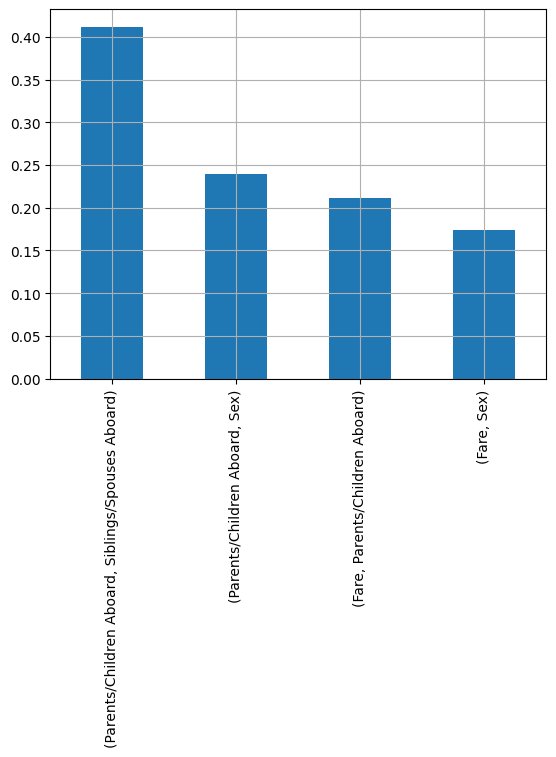

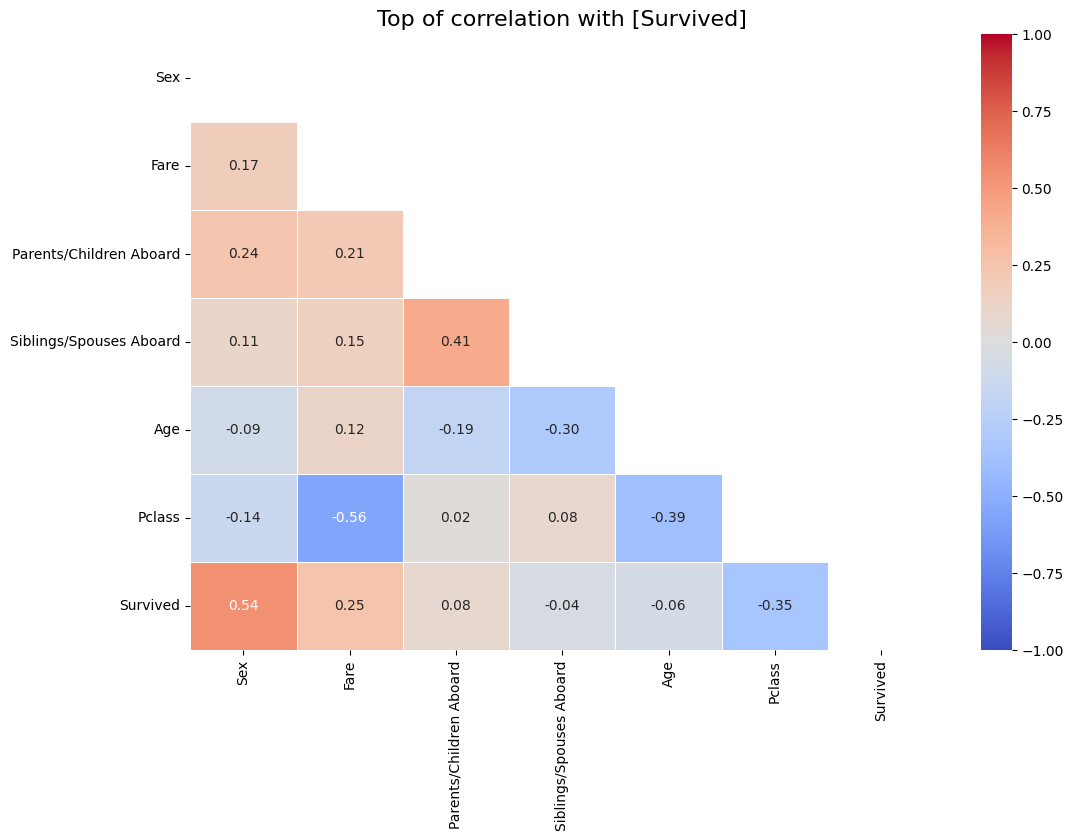

Sex                        0.539543
Fare                       0.251258
Parents/Children Aboard    0.075335
Siblings/Spouses Aboard   -0.042782
Age                       -0.057312
Pclass                    -0.349683
Name: Survived, dtype: float64

In [12]:
#Drop name, for now
no_name_DF = df.drop(columns = ['Name'])
plot_overall_correlation_for(no_name_DF,'Survived',5)
plot_correlation_for(no_name_DF, 'Survived',10)

## Fare and PClass have high correlation. So... look it up?

In [13]:
'''Pclasses = ['class_0','class_1','class_2']
fig, axs = plt.subplots(1, len(Pclasses), figsize=(20,10))
for i,Pclass in enumerate(Pclasses):
    sns.histplot(no_name_DF[no_name_DF[Pclass] == 1]['Fare'], ax = axs[i], label = f'Pclass =[{Pclass}]')
plt.show()
'''

"Pclasses = ['class_0','class_1','class_2']\nfig, axs = plt.subplots(1, len(Pclasses), figsize=(20,10))\nfor i,Pclass in enumerate(Pclasses):\n    sns.histplot(no_name_DF[no_name_DF[Pclass] == 1]['Fare'], ax = axs[i], label = f'Pclass =[{Pclass}]')\nplt.show()\n"

In [14]:
'''
_0 = df.loc[df['class_0'] == 1, 'Fare'].values
_1 = df.loc[df['class_1'] == 1, 'Fare'].values
_2 = df.loc[df['class_2'] == 1, 'Fare'].values
plt.boxplot([_0,_1,_2], labels = ["0","1","2"])
'''

'\n_0 = df.loc[df[\'class_0\'] == 1, \'Fare\'].values\n_1 = df.loc[df[\'class_1\'] == 1, \'Fare\'].values\n_2 = df.loc[df[\'class_2\'] == 1, \'Fare\'].values\nplt.boxplot([_0,_1,_2], labels = ["0","1","2"])\n'

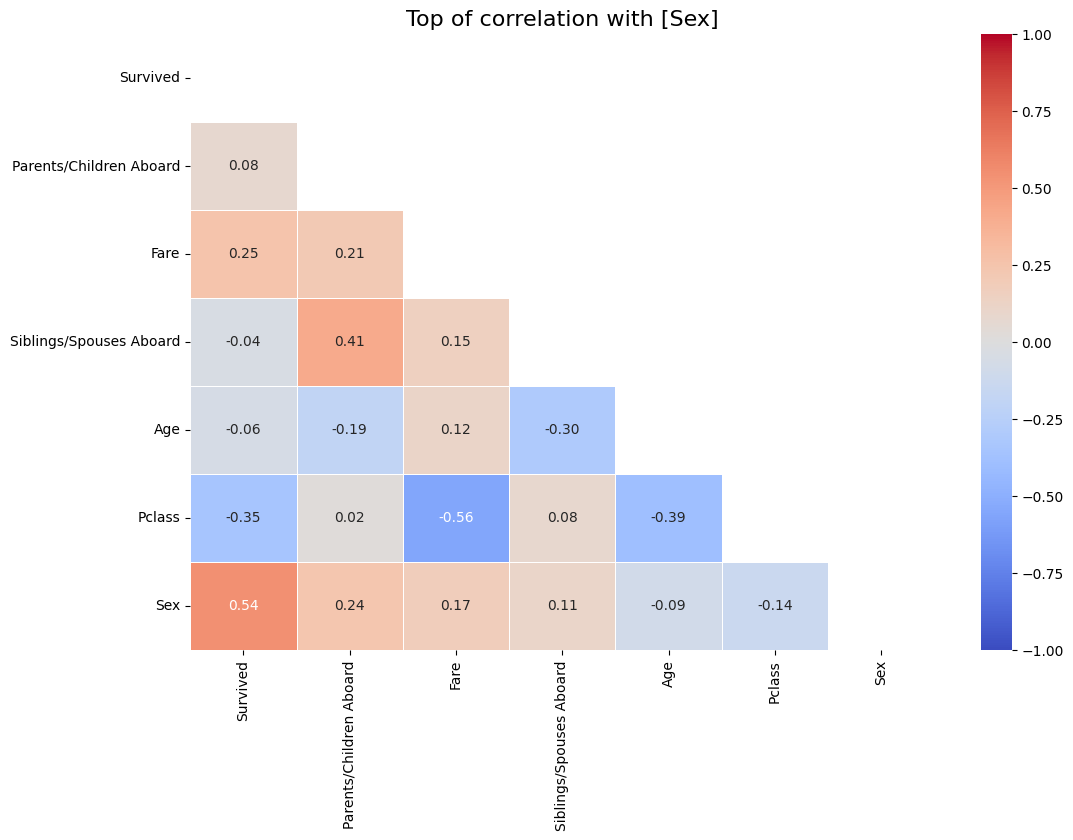

Survived                   0.539543
Parents/Children Aboard    0.239885
Fare                       0.174323
Siblings/Spouses Aboard    0.107908
Age                       -0.090220
Pclass                    -0.137042
Name: Sex, dtype: float64

In [15]:
plot_correlation_for(no_name_DF, 'Sex',10)

In [16]:
#Correlation between sex and survival. In Percent
women = no_name_DF.loc[no_name_DF.Sex == 1]["Survived"]
rate_women = (sum(women)/len(women) ) * 100
print(f"Survival rate woman : {rate_women:,.2f} %")

man = no_name_DF.loc[no_name_DF.Sex == 0]["Survived"]
rate_men = (sum(man)/len(man))*100
print(f"Survival rate man : {rate_men:,.2f} %")


Survival rate woman : 74.20 %
Survival rate man : 19.35 %


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
X = no_name_DF.drop('Survived', axis = 1)
y = no_name_DF['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
log_reg = LogisticRegression(max_iter=1000) ## I have some error in here...
log_reg.fit(X_train.values, y_train) # Provide only values without headers!
log_reg.score(X_test.values, y_test)


<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, 0 to 886
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   872 non-null    int64  
 1   Sex                      872 non-null    int64  
 2   Age                      872 non-null    int8   
 3   Siblings/Spouses Aboard  872 non-null    int8   
 4   Parents/Children Aboard  872 non-null    int8   
 5   Fare                     872 non-null    float64
dtypes: float64(1), int64(2), int8(3)
memory usage: 29.8 KB
None
<class 'pandas.core.series.Series'>
Index: 872 entries, 0 to 886
Series name: Survived
Non-Null Count  Dtype
--------------  -----
872 non-null    int64
dtypes: int64(1)
memory usage: 13.6 KB
None


0.7951388888888888

In [46]:
from sklearn.model_selection import cross_val_score

cross_val_score(log_reg, X, y, cv=5).mean()

0.7924269293924466

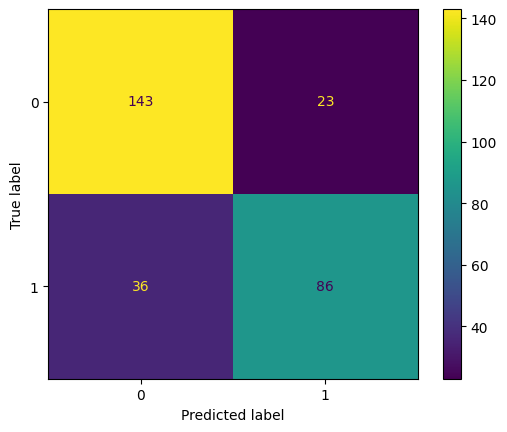

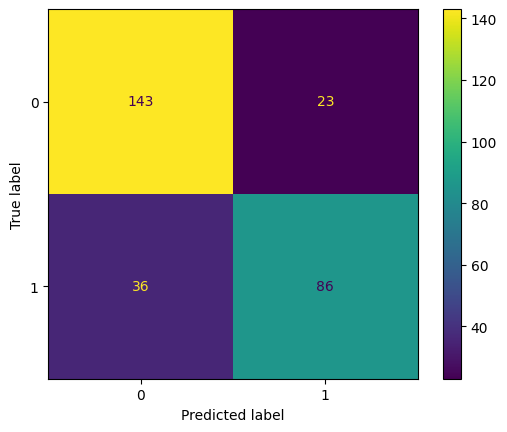

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_predicted = log_reg.predict(X_test.values)
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay.from_estimator(log_reg, X_test.values, y_test)
disp.plot()

/home/mg/AI_Py_3_10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


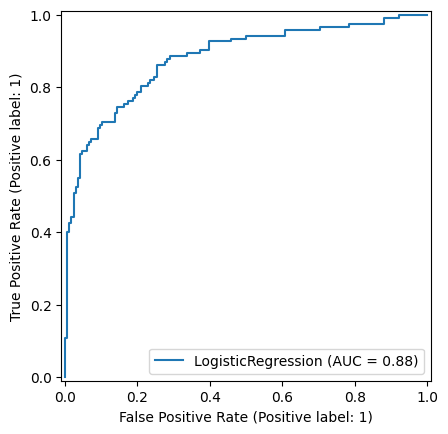

In [51]:
from sklearn.metrics import RocCurveDisplay
log_regrression_curve = RocCurveDisplay.from_estimator(log_reg, X_test, y_test)


# Some random predictions

In [58]:
print(X.columns)


Index(['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [62]:
_30_female_no_kids = [[1, 1, 30, 1, 0, 21]]
log_reg.predict(_30_female_no_kids)[0]
probability = log_reg.predict_proba(_30_female_no_kids)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 89.3%


In [63]:
_30_male_no_kids = [[1, 0, 30, 1, 0, 21]]
log_reg.predict(_30_male_no_kids)[0]
probability = log_reg.predict_proba(_30_male_no_kids)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 39.9%
